# Random Forest Classifier

In this notebook, we employ a Random Forest Classifier to predict the cardinal direction of flights. The goal is to develop a robust model capable of accurately determining flight directions. Through feature importance analysis, we identify arrival time, departure time, and ticket price as crucial predictors. Fine-tuning the model using Grid Search reveals optimal hyperparameters below. The model's effectiveness is evaluated with an accuracy score, reaching a noteworthy 0.8994 on the test set. This notebook provides a comprehensive exploration of the classification modeling process, emphasizing feature selection, model tuning, and insights into the predictive capabilities of the Random Forest Classifier for flight direction prediction.

| Parameter                 | Value |
|---------------------------|-------|
| `rfc__max_depth`          | 30    |
| `rfc__min_samples_leaf`   | 1     |
| `rfc__min_samples_split`  | 2     |
| `rfc__n_estimators`       | 160   |
| accuracy                  |  0.8994 |

In [43]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/feature_eng_data', index_col=False).drop(columns='Unnamed: 0')

In [3]:
df.head(1)

,airline,flight,origin,departure_time,stops,arrival_time,destination,class,duration,price,card_direction,origin_lat_long,destination_lat_long,origin_latitude,origin_longitude,destination_latitude,destination_longitude
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,130,71.44,W,"(28.6139, 77.209)","(19.076, 72.8777)",28.6139,77.209,19.076,72.8777


### Only including Flights out of a specific airport

In [5]:
df = df.groupby('origin').get_group('Hyderabad')

In [6]:
X = pd.concat([df[[ 'stops', 'class', 'price']], df['departure_time'].map({'Early_Morning': 0, 'Morning':1, 'Afternoon':2,'Evening':3, 'Night':4,'Late_Night':5}),df['arrival_time'].map({'Early_Morning': 0, 'Morning':1, 'Afternoon':2,'Evening':3, 'Night':4,'Late_Night':5}),pd.get_dummies(df['airline'],dtype = int)], axis=1)
y = df['card_direction']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### RFC using all columns

In [8]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score is {accuracy}")

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(np.concatenate((y_test, y_pred))))

disp.plot(cmap='Blues', values_format='d')

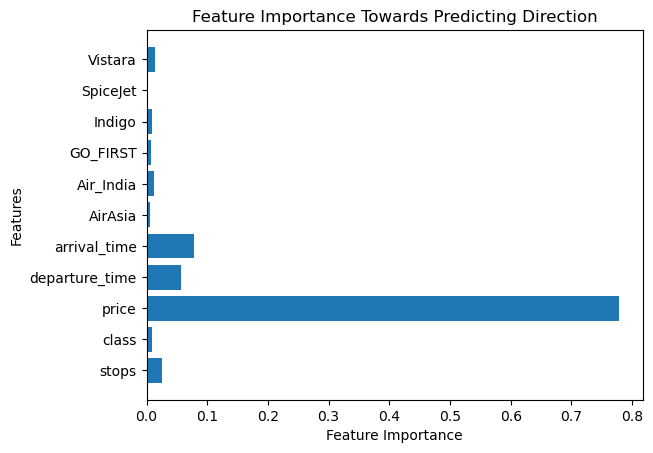

In [28]:
feature_importances = rfc.feature_importances_
features = X_train.columns  # replace with your feature names

plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Towards Predicting Direction')
plt.show()

### RFC including only departure arrival and price

In [35]:
X_new = X[['arrival_time', 'departure_time', 'price']]
y=y

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [37]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score is {accuracy}")

Accuracy Score is 0.8990443518745406


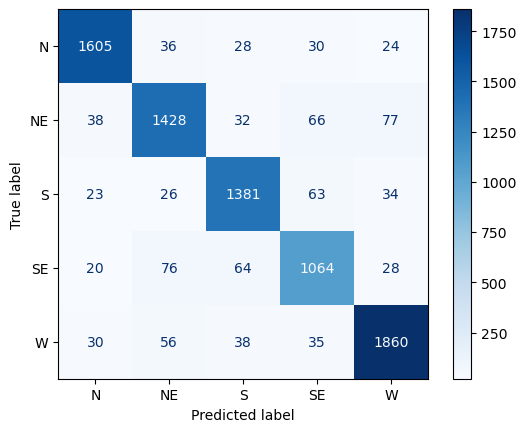

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(np.concatenate((y_test, y_pred))))

disp.plot(cmap='Blues', values_format='d')

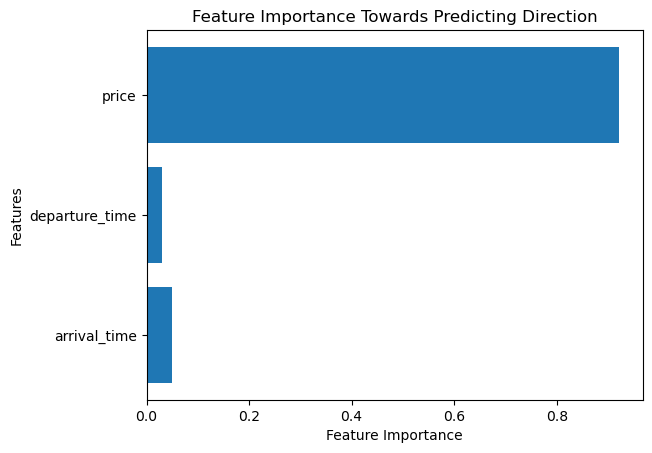

In [39]:
feature_importances = rfc.feature_importances_
features = X_train.columns  # replace with your feature names

plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Towards Predicting Direction')
plt.show()

### RFC Gridsearch to improve Accuracy score

In [54]:
pipe = Pipeline(steps=[
    ('rfc', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rfc__n_estimators': [155,160,165],
    'rfc__max_depth': [30],
    'rfc__min_samples_split': [2],
    'rfc__min_samples_leaf': [1]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfc',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rfc__max_depth': [30, 32],
                         'rfc__min_samples_leaf': [1],
                         'rfc__min_samples_split': [2],
                         'rfc__n_estimators': [155, 160, 165]},
             scoring='accuracy')

In [56]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the classifier with the best parameters
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy Score: {accuracy}")

Best Parameters: {'rfc__max_depth': 30, 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 2, 'rfc__n_estimators': 160}
Best Accuracy Score: 0.8994119088458711


Best Parameters: {'rfc__max_depth': 30, 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 2, 'rfc__n_estimators': 160}
Best Accuracy Score: 0.8994119088458711

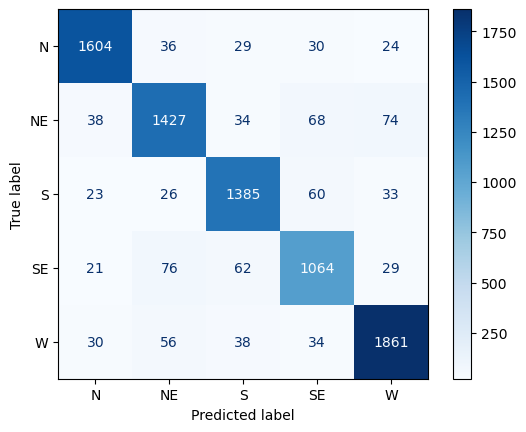

In [57]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(np.concatenate((y_test, y_pred))))

disp.plot(cmap='Blues', values_format='d')